In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
data1 = h5py.File('myout005-ecc.hdf5','r')
data2 = h5py.File('myout005.hdf5','r')
data_3D1 = np.array(data1['pos'])
data_3D2 = np.array(data2['pos'])
print(data_3D1.shape)
data1_burn = data_3D1[1000:]
data2_burn = data_3D2[1000:]
print(data1_burn.shape)

(3000, 100, 5)
(2000, 100, 5)


/var/folders/98/f5nlt1g57fd14wkntrh3c8w40000gn/T/ipykernel_4285/3222064467.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  data_3D1 = np.array(data1['pos'])
/var/folders/98/f5nlt1g57fd14wkntrh3c8w40000gn/T/ipykernel_4285/3222064467.py:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  data_3D2 = np.array(data2['pos'])


[0.03415037 0.03426775 0.03472805 ... 0.06528172 0.06608824 0.06608824]


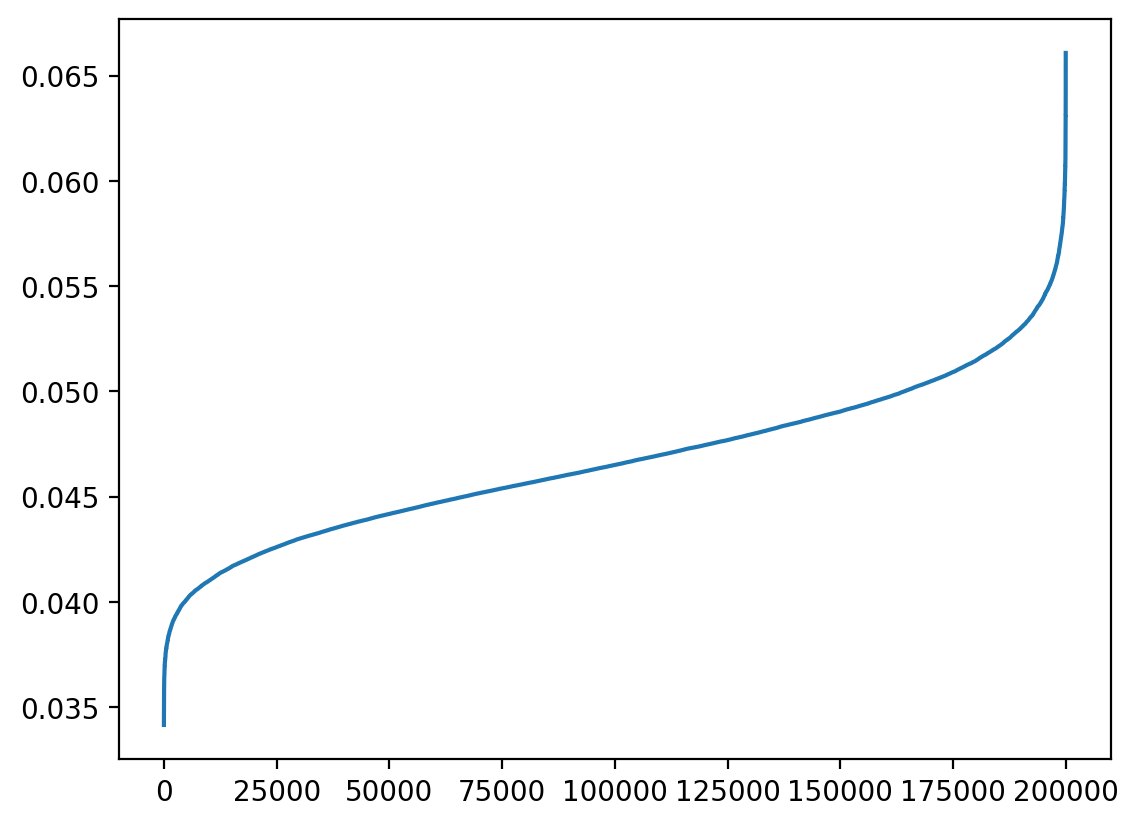

In [6]:
data_new1 = data1_burn.reshape((200000,5))
data_new2 = data2_burn.reshape((200000,4))
data_3D1_col_rm = data_new1[:,:4]
#print(data_new1)
#print(data_new2)
print(np.sort(data_new1[:,-1]))
plt.plot(np.sort(data_new1[:,-1]))

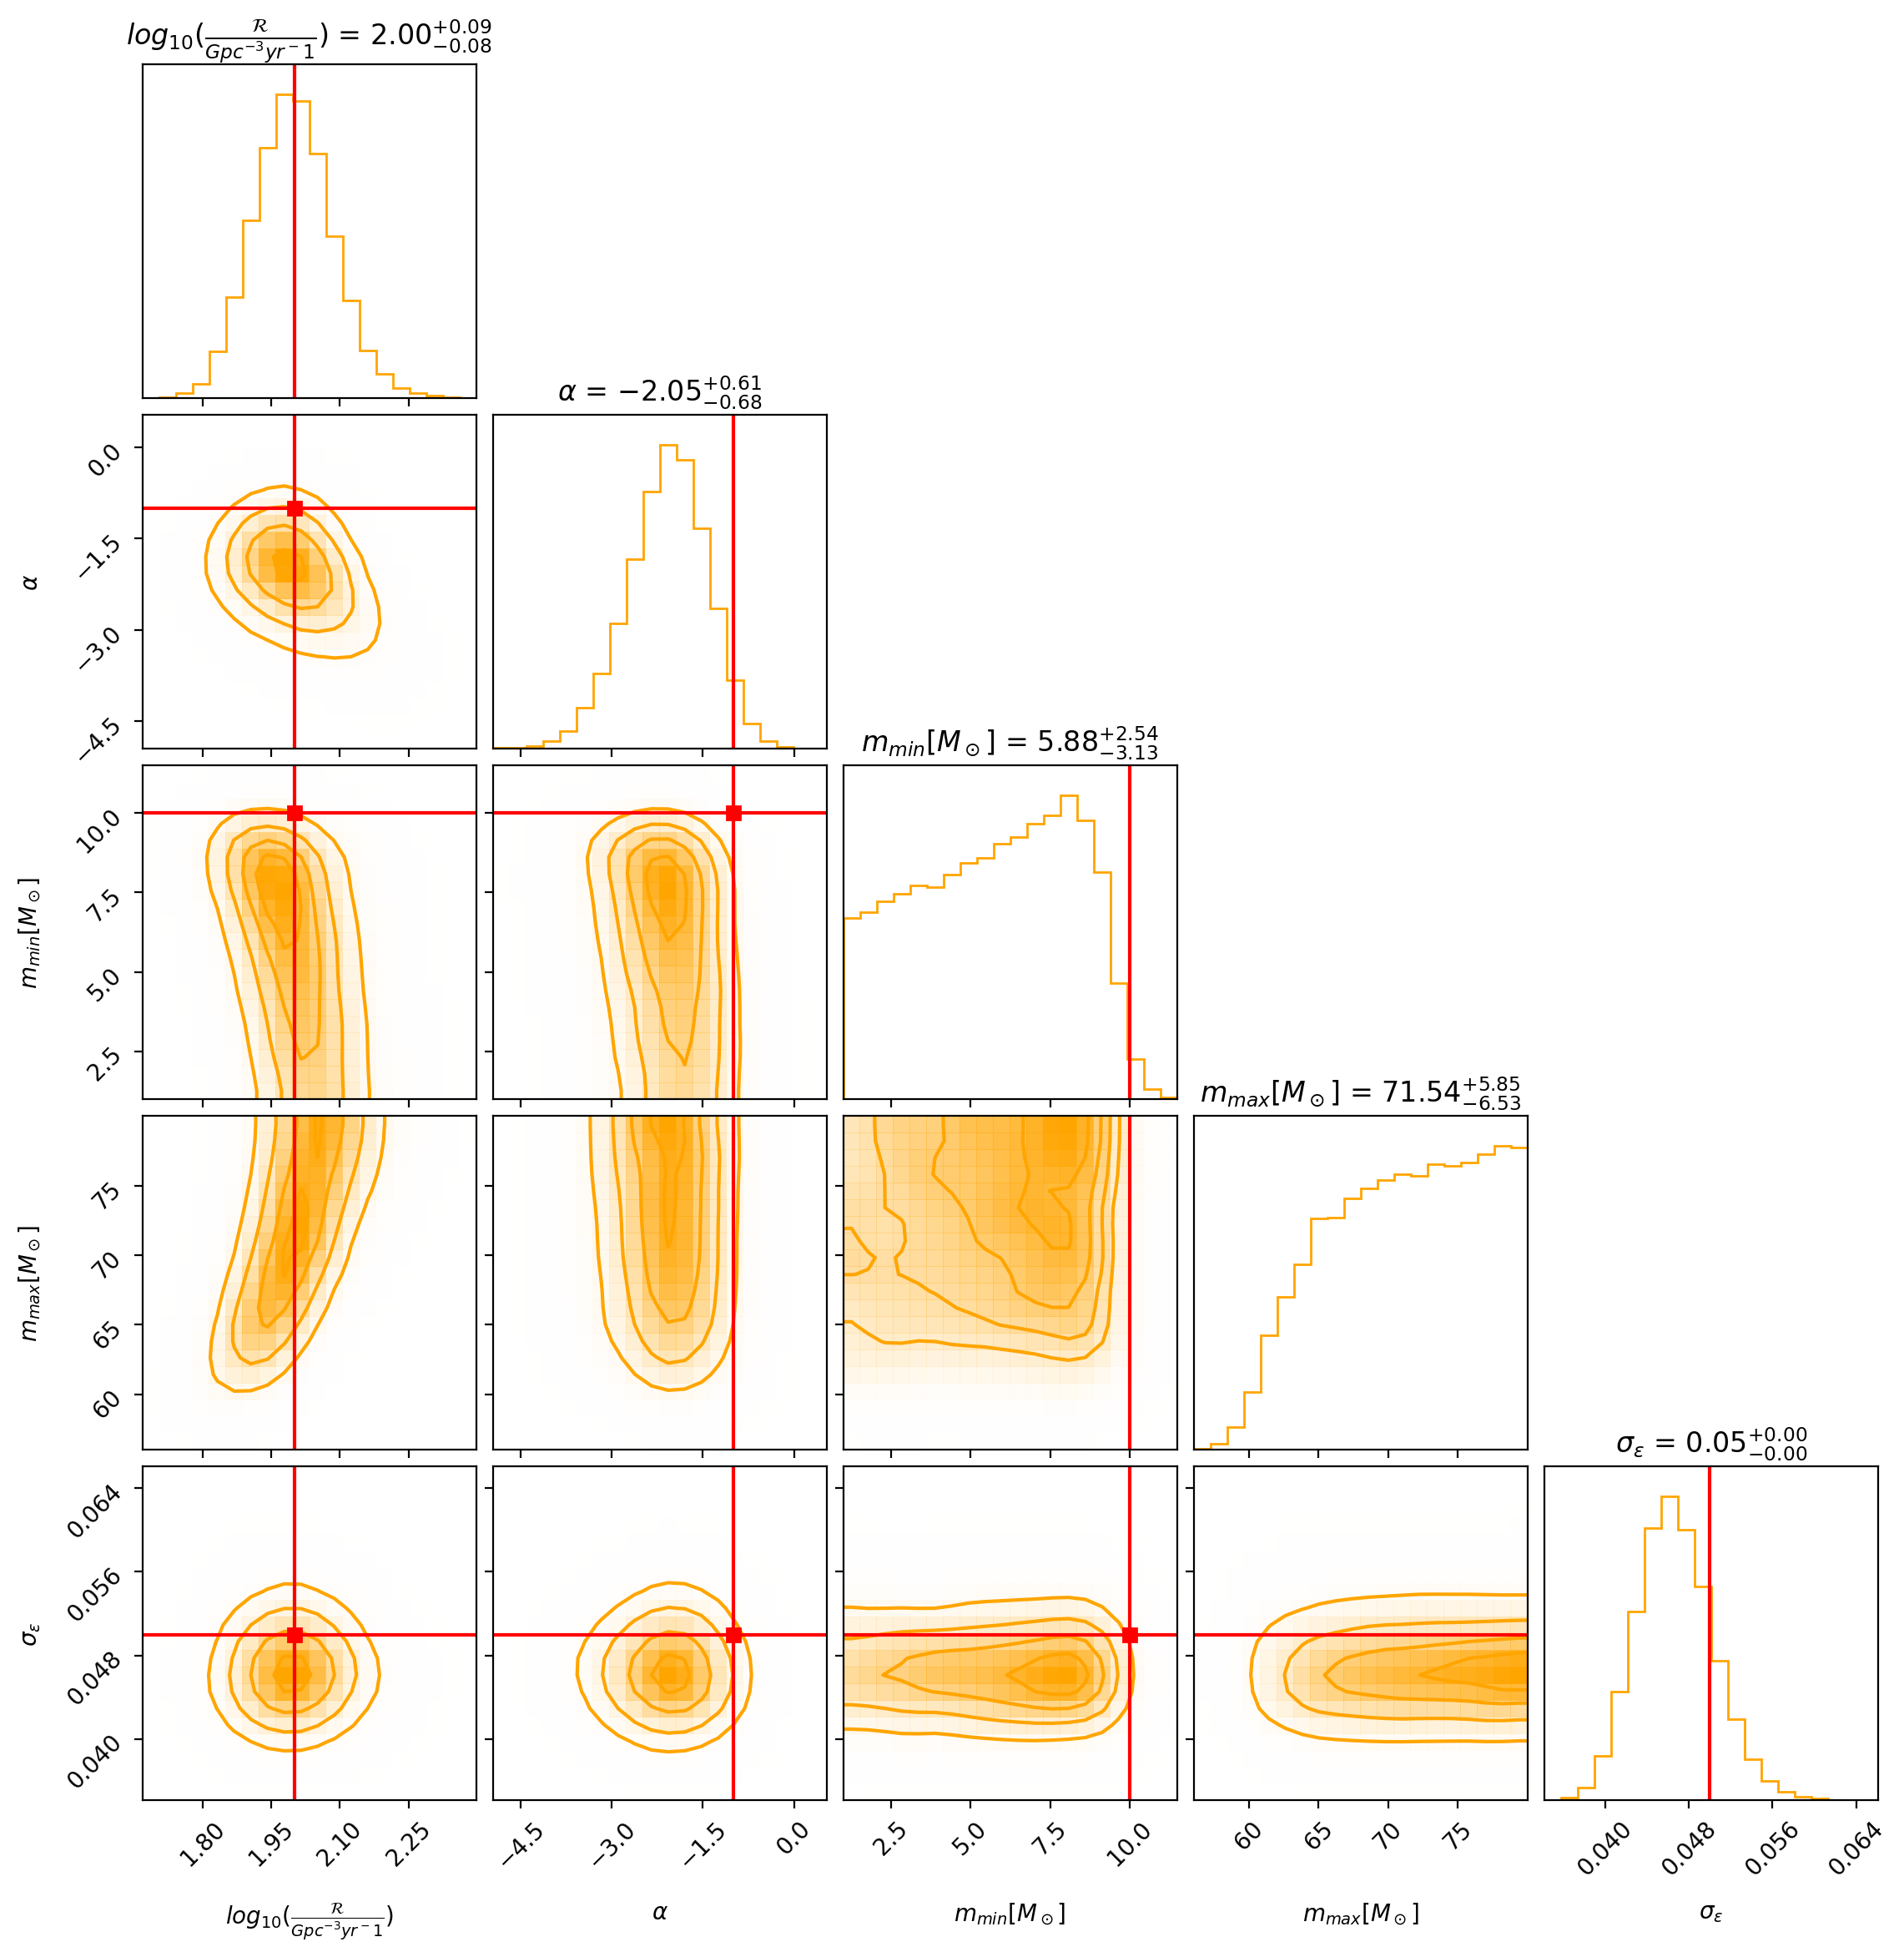

In [7]:
labels=[r"$log_{10}(\frac{\mathcal{R}}{Gpc^{-3}yr^-1})$", r"$\alpha$", r"$m_{min} [M_\odot$]",r"$m_{max} [M_\odot]$",
        "$\sigma_\epsilon$"]

#limits = [(1.2, 2.8),(-6,2),(0,15),(40,90),(0,0.1)]
# Calculate the mean values along each dimension
mean_values1 = np.mean(data_new1, axis=0)
#provide true values if any
truth_values = [2, -1, 10, 50, 0.05]
#plotting the corner plot
figure1 = corner.corner(data_new1,labels=labels
                      ,show_titles=True,plot_datapoints=False,color='orange',
                        truths=truth_values,truth_color='red',smooth=True)
figure1.savefig("cor_005_ecc.png")

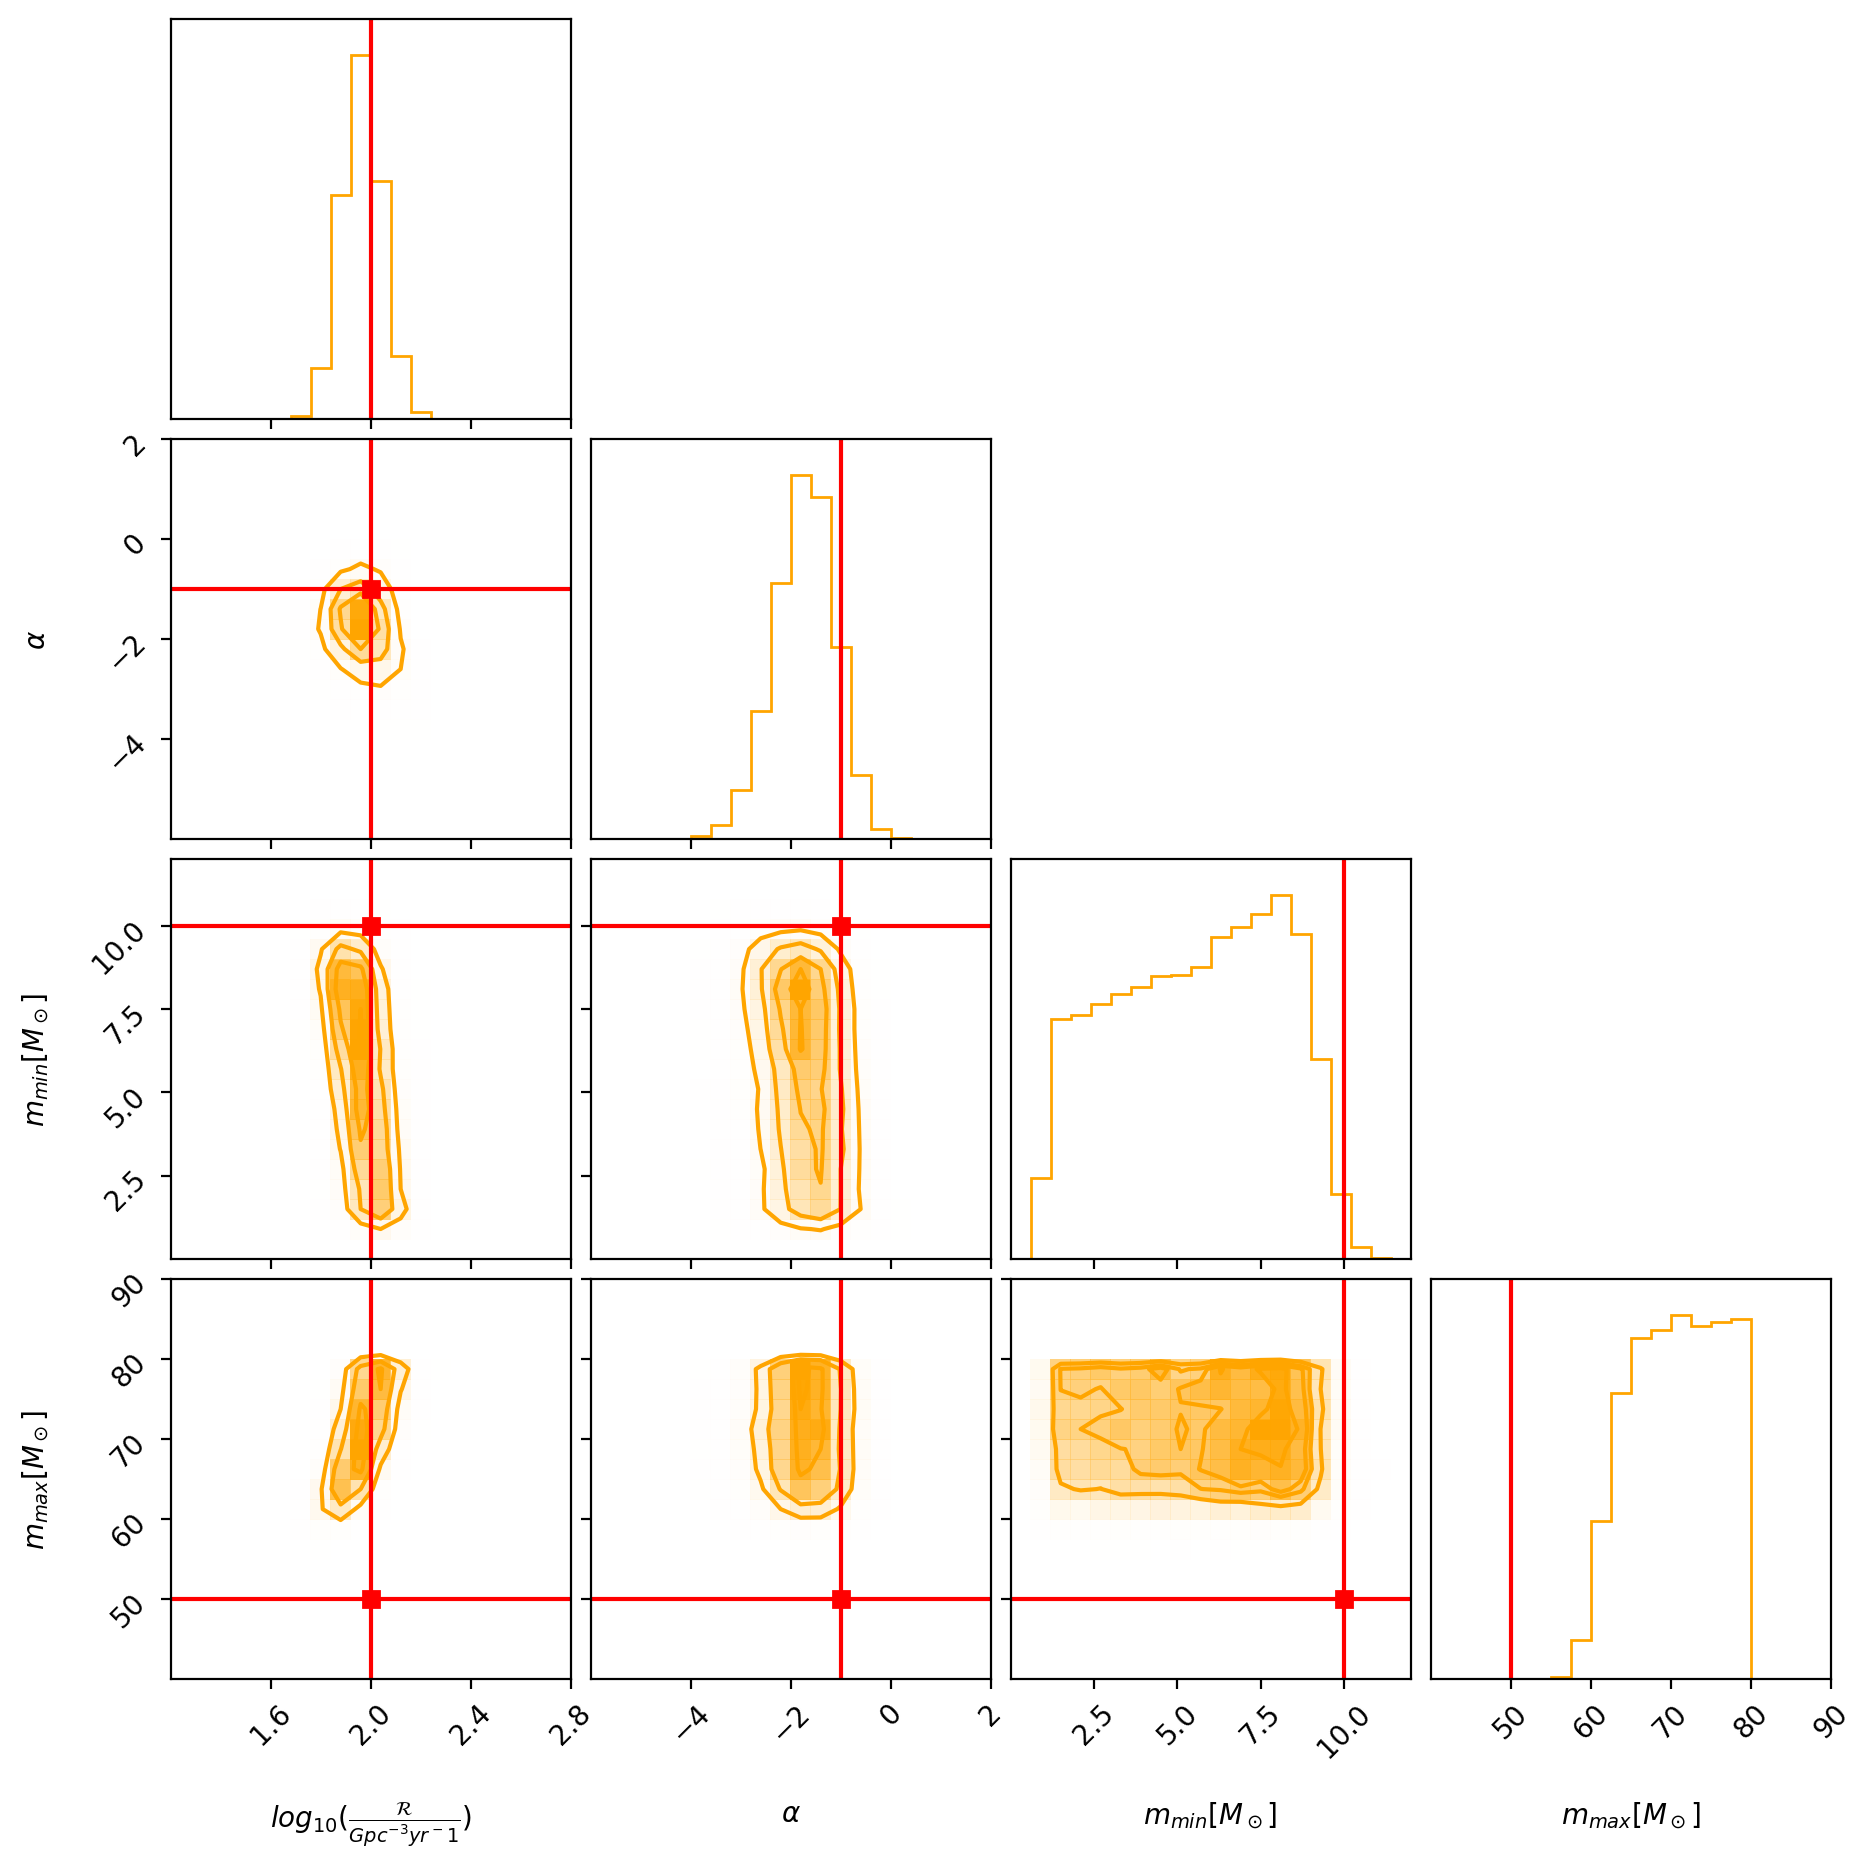

In [4]:
labels0=[r"$log_{10}(\frac{\mathcal{R}}{Gpc^{-3}yr^-1})$", r"$\alpha$", r"$m_{min} [M_\odot]$",r"$m_{max} [M_\odot]$"]
limits0 = [(1.2, 2.8),(-6,2),(0,12),(40,90)]

truth_values1 = [2, -1, 10, 50]
#plotting the corner plot
figure2 = corner.corner(data_new2,labels=labels0
                      ,show_titles=False,plot_datapoints=False,color='orange',
                        truths=truth_values1,truth_color='red',range=limits0)
    

### We may be able to combine corner plots with eccentricity. But we do need to add the extra dimension without any data into it.

In [13]:
# Create an empty column (filled with None values)
#new_column = np.full((100, 10000, 1), None, dtype=object)
#new_column = np.zeros((100, 10000, 1))
new_column = np.random.randint(0, 10, size=(3000, 100, 1))

# Concatenate the new column with the 3D array along the last axis (axis=2)
data_3D2_col_add = np.concatenate((data_3D2, new_column), axis=2)
data3_burn = data_3D2_col_add[300:]
data_new3 = data3_burn.reshape((270000,5))
#print(data_3D2_col_add)

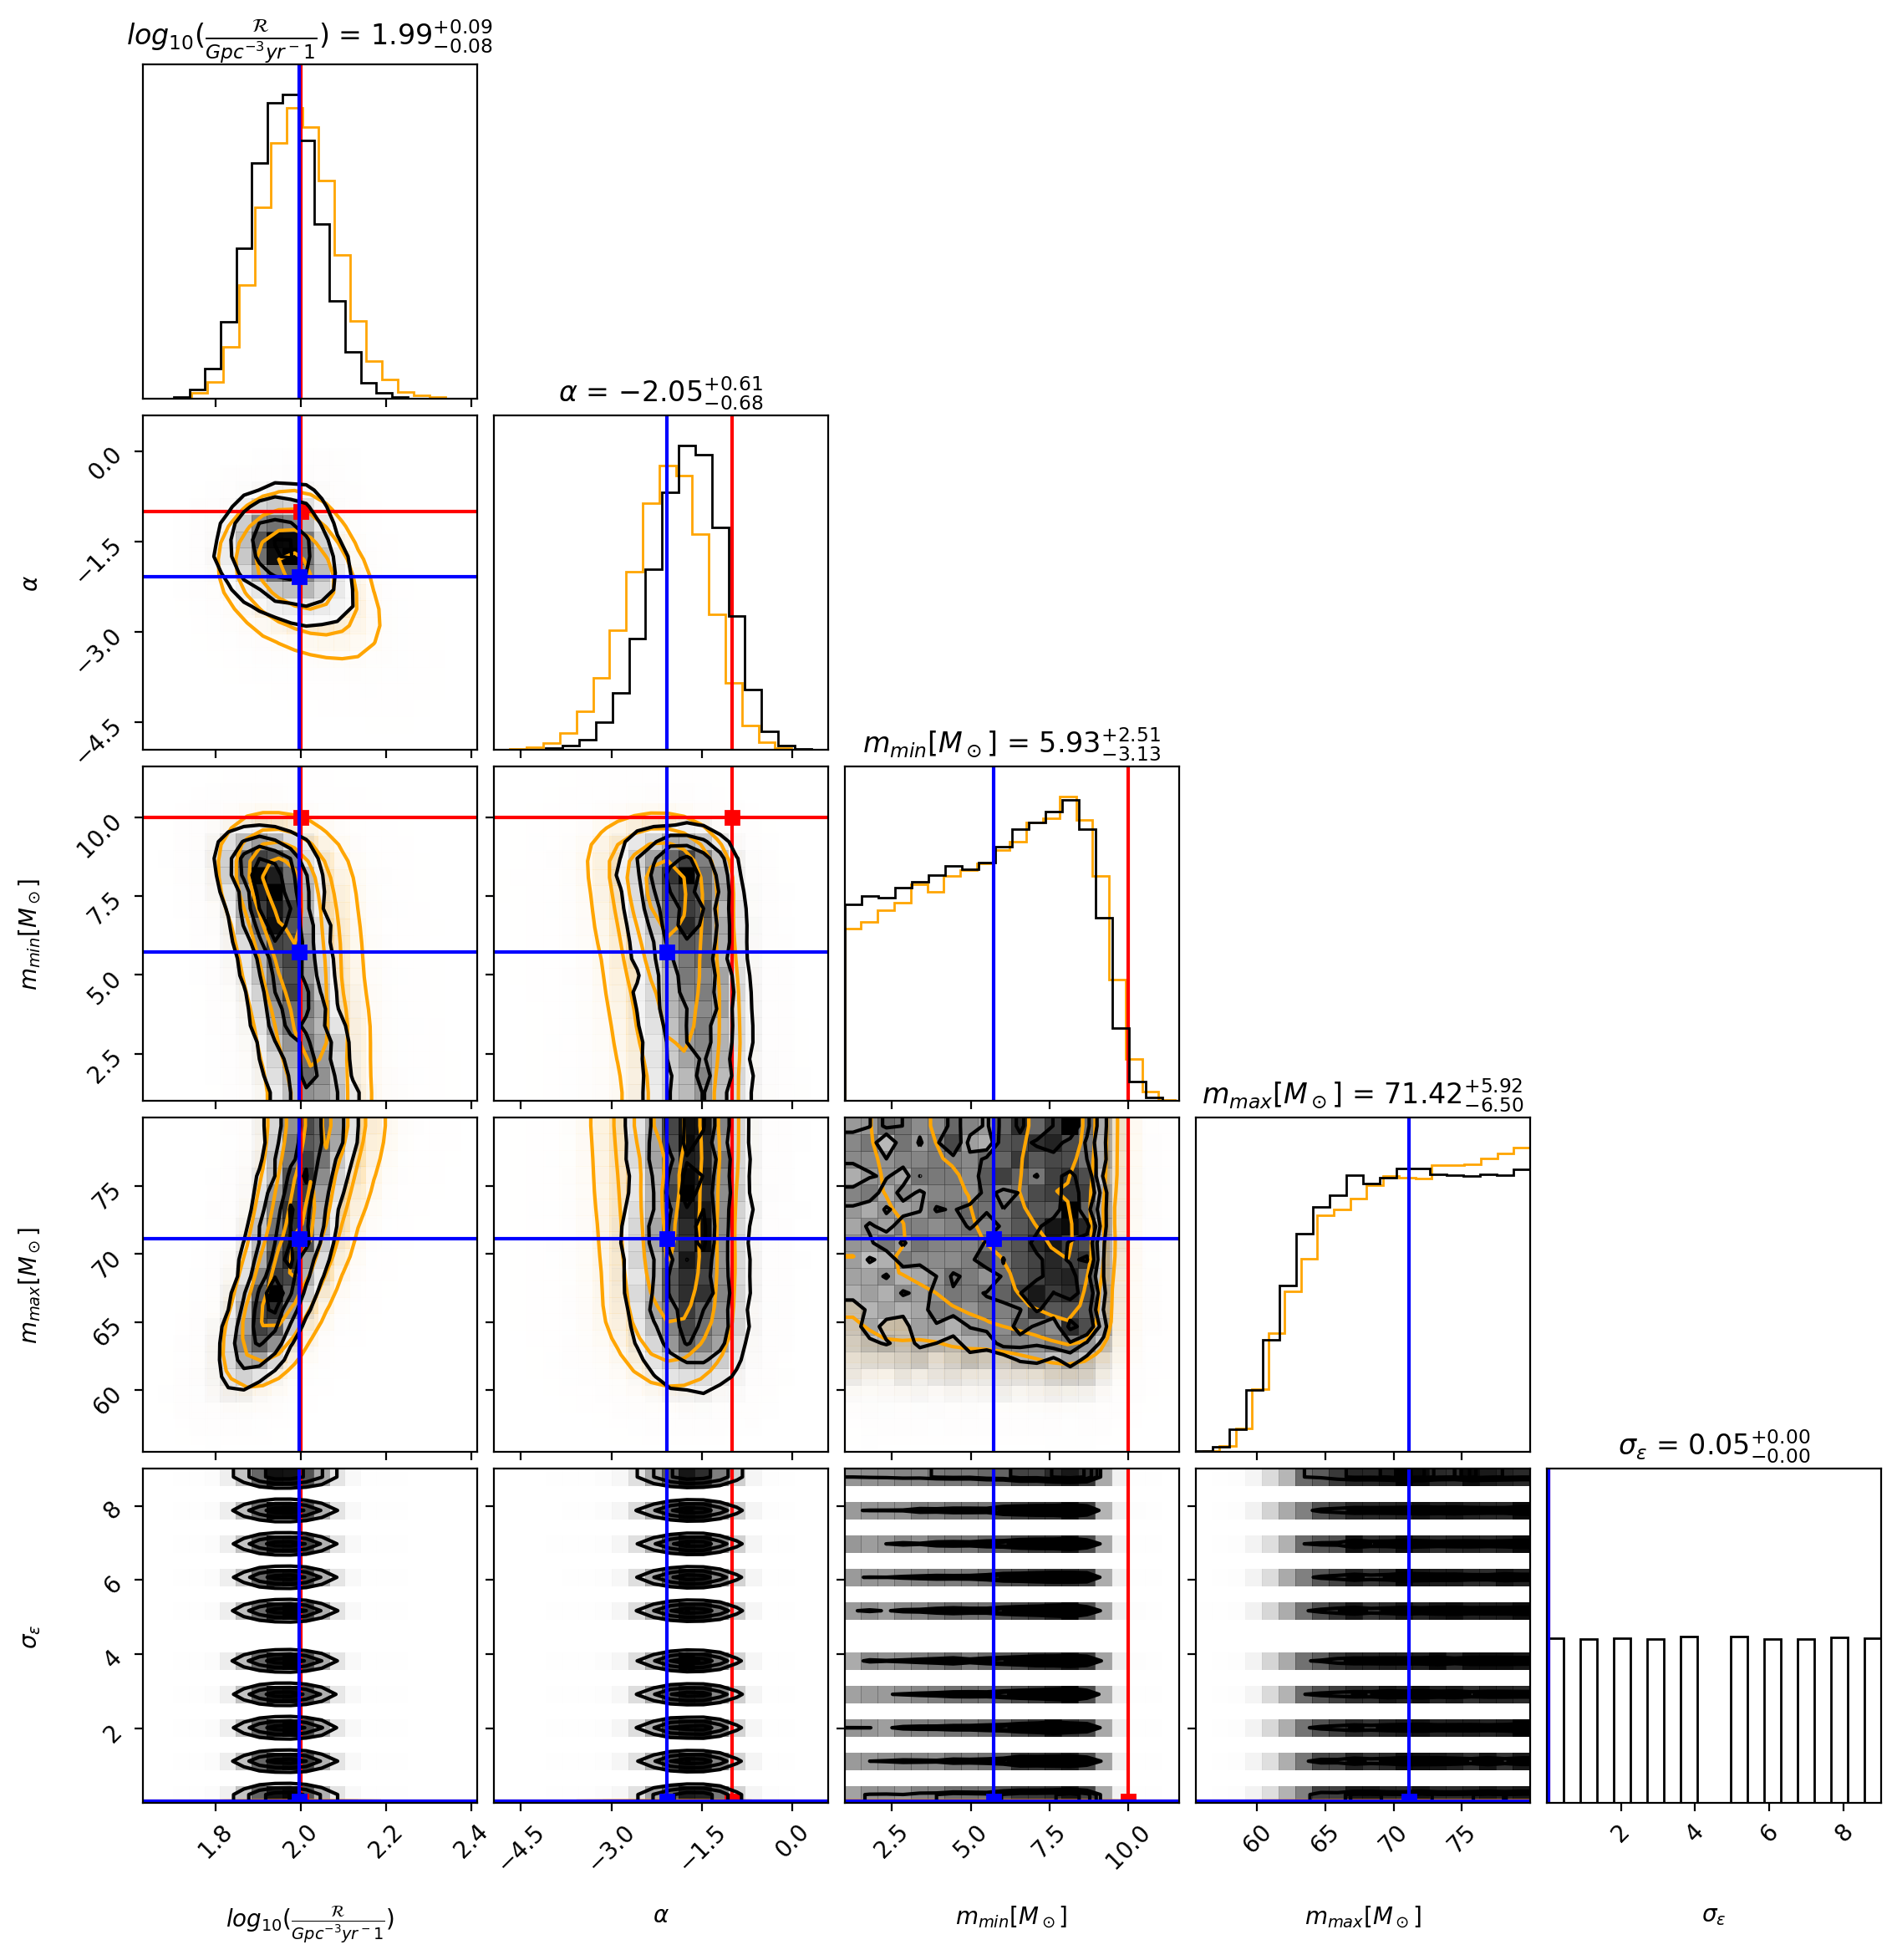

In [15]:
corner.corner(data_new3,fig=figure1,labels=labels
                      ,show_titles=False,plot_datapoints=False,color='black'
              ,truths=mean_values1,truth_color='blue')
#figure1.savefig("com_0.2_ecc.png")